In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [2]:
initial = pd.read_csv('c:\users\lisak\documents\github\patchseq_gdoc_analysis\patch_seq_log_mouse.csv')

In [3]:
ps = initial[["Date", "Slice (Lims ID?)", "Morph", "cell type","Post patch?", "Post patch pipette R", "Nucleus sucked in?", "Internal version", "PCR cycles", "SM_QC_PF", "Bad dates"]]
ps.dropna(subset = ["Post patch?", "Morph"], inplace = True)
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["PCR cycles"] == 21]
ps = ps[ps["cell type"] == "tdt+"]
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps.drop("Bad dates", 1)
ps

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

,Date,Slice (Lims ID?),Morph,cell type,Post patch?,Post patch pipette R,Nucleus sucked in?,Internal version,PCR cycles,SM_QC_PF
5016,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
5017,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
5018,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,fail
5019,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
5020,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
5021,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,Partial-Nucleus,NaN,NaN,AiV2,21.0,pass
5022,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass
5023,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,q,tdt+,No-Seal,NaN,NaN,AiV2,21.0,pass
5026,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass
5027,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass


In [4]:
def get_count(x):    
    count = x["Post patch?"].count()
    return count

def calc_pct(part,total):
    pct = float(get_count(part)) / get_count(total)
    return pct

In [5]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 501))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 500))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 501))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 500))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire
    
def pass_only(df):
    pas = df[df["SM_QC_PF"] == "pass"]
    return pas

def gen_filter(df, col, cond):
    filtr = df[df[col] == cond]
    return filtr

In [6]:
nuc = nucleated(ps)
nuc["post patch class"] = "Nucleated"

part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "Partial nucleated"

out_out = outside_out(ps)
out_out["post patch class"] = "Outside out"

noSeal = no_seal(ps)
noSeal["post patch class"] = "No seal"

entirecell = entire_cell(ps)
entirecell["post patch class"] = "Entire Cell"

frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps2 = pd.concat(frames)
ps2

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anacond

,Date,Slice (Lims ID?),Morph,cell type,Post patch?,Post patch pipette R,Nucleus sucked in?,Internal version,PCR cycles,SM_QC_PF,post patch class
5022,2017-04-21,Gad2-IRES-Cre;Ai14-313294.04.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5026,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5027,2017-04-21,Gad2-IRES-Cre;Ai14-313294.03.02,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5035,2017-04-21,Gad2-IRES-Cre;Ai14-313294.05.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5051,2017-04-24,Rorb-IRES2-Cre;Ai14-315898.03.01,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5063,2017-04-24,Rorb-IRES2-Cre;Ai14-315898.04.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5073,2017-04-25,Rorb-IRES2-Cre;Ai14-315897.04.01,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5084,2017-04-25,Rorb-IRES2-Cre;Ai14-315897.04.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5085,2017-04-25,Rorb-IRES2-Cre;Ai14-315897.04.02,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated
5089,2017-04-25,Rorb-IRES2-Cre;Ai14-315897.05.02,q,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated


In [7]:
ps2.count()

Date                    1519
Slice (Lims ID?)        1519
Morph                   1519
cell type               1519
Post patch?             1519
Post patch pipette R     201
Nucleus sucked in?       201
Internal version        1519
PCR cycles              1519
SM_QC_PF                1516
post patch class        1519
dtype: int64

In [8]:
ps2['Cre_line'] = ps2['Slice (Lims ID?)'].str[:-13]
ps3 = ps2.drop('Slice (Lims ID?)', 1)
ps3

,Date,Morph,cell type,Post patch?,Post patch pipette R,Nucleus sucked in?,Internal version,PCR cycles,SM_QC_PF,post patch class,Cre_line
5022,2017-04-21,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Gad2-IRES-Cre;Ai14
5026,2017-04-21,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Gad2-IRES-Cre;Ai14
5027,2017-04-21,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Gad2-IRES-Cre;Ai14
5035,2017-04-21,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Gad2-IRES-Cre;Ai14
5051,2017-04-24,y,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5063,2017-04-24,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5073,2017-04-25,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5084,2017-04-25,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5085,2017-04-25,n,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5089,2017-04-25,q,tdt+,Nucleated,NaN,NaN,AiV2,21.0,pass,Nucleated,Rorb-IRES2-Cre;Ai14


In [9]:
ps3.count()

Date                    1519
Morph                   1519
cell type               1519
Post patch?             1519
Post patch pipette R     201
Nucleus sucked in?       201
Internal version        1519
PCR cycles              1519
SM_QC_PF                1516
post patch class        1519
Cre_line                1519
dtype: int64

In [10]:
ps4 = ps3[["Date", "Morph", "Internal version", "SM_QC_PF", "post patch class", "Cre_line"]]
ps4 = ps4[(ps4['Morph'] == 'n') | (ps4['Morph'] == 'y') | (ps4['Morph'] == 'q')]
ps4

,Date,Morph,Internal version,SM_QC_PF,post patch class,Cre_line
5022,2017-04-21,n,AiV2,pass,Nucleated,Gad2-IRES-Cre;Ai14
5026,2017-04-21,n,AiV2,pass,Nucleated,Gad2-IRES-Cre;Ai14
5027,2017-04-21,y,AiV2,pass,Nucleated,Gad2-IRES-Cre;Ai14
5035,2017-04-21,n,AiV2,pass,Nucleated,Gad2-IRES-Cre;Ai14
5051,2017-04-24,y,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5063,2017-04-24,n,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5073,2017-04-25,n,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5084,2017-04-25,n,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5085,2017-04-25,n,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14
5089,2017-04-25,q,AiV2,pass,Nucleated,Rorb-IRES2-Cre;Ai14


In [11]:
ps4["Morph"].value_counts()

n    891
y    310
q    262
Name: Morph, dtype: int64

In [12]:
ps5 = ps4[["Cre_line", "Morph", "Internal version"]]
ps5

,Cre_line,Morph,Internal version
5022,Gad2-IRES-Cre;Ai14,n,AiV2
5026,Gad2-IRES-Cre;Ai14,n,AiV2
5027,Gad2-IRES-Cre;Ai14,y,AiV2
5035,Gad2-IRES-Cre;Ai14,n,AiV2
5051,Rorb-IRES2-Cre;Ai14,y,AiV2
5063,Rorb-IRES2-Cre;Ai14,n,AiV2
5073,Rorb-IRES2-Cre;Ai14,n,AiV2
5084,Rorb-IRES2-Cre;Ai14,n,AiV2
5085,Rorb-IRES2-Cre;Ai14,n,AiV2
5089,Rorb-IRES2-Cre;Ai14,q,AiV2


In [13]:
ps6 = ps5.groupby(["Cre_line", "Morph"]).count()
ps6 = ps6.rename(columns={'Internal version': 'counts'})
ps6 = ps6.reset_index()
ps6

,Cre_line,Morph,counts
0,Chat-IRES-Cre-neo;Ai14,n,8
1,Chat-IRES-Cre-neo;Ai14,q,3
2,Chat-IRES-Cre-neo;Ai14,y,2
3,Chrna2-Cre_OE25;Ai14,n,34
4,Chrna2-Cre_OE25;Ai14,q,16
5,Chrna2-Cre_OE25;Ai14,y,10
6,Ctgf-T2A-dgCre;Ai14,n,2
7,Ctgf-T2A-dgCre;Ai14,q,4
8,Ctgf-T2A-dgCre;Ai14,y,3
9,Cux2-CreERT2;Ai14,n,26


In [38]:
ps6 = ps6.rename(columns={'counts':''})
ps6

,Cre_line,Morph,
0,Chat-IRES-Cre-neo;Ai14,n,8
1,Chat-IRES-Cre-neo;Ai14,q,3
2,Chat-IRES-Cre-neo;Ai14,y,2
3,Chrna2-Cre_OE25;Ai14,n,34
4,Chrna2-Cre_OE25;Ai14,q,16
5,Chrna2-Cre_OE25;Ai14,y,10
6,Ctgf-T2A-dgCre;Ai14,n,2
7,Ctgf-T2A-dgCre;Ai14,q,4
8,Ctgf-T2A-dgCre;Ai14,y,3
9,Cux2-CreERT2;Ai14,n,26


In [14]:
ps6.to_csv('creline_list.csv')

In [40]:
ps7 = ps6.pivot_table(values=[''], index=['Cre_line'], columns=['Morph'], aggfunc='sum')
ps7.fillna(0, inplace=True)
ps7

Morph                                      n     q     y
Cre_line                                                
Chat-IRES-Cre-neo;Ai14                   8.0   3.0   2.0
Chrna2-Cre_OE25;Ai14                    34.0  16.0  10.0
Ctgf-T2A-dgCre;Ai14                      2.0   4.0   3.0
Cux2-CreERT2;Ai14                       26.0   8.0   3.0
Gad2-IRES-Cre;Ai14                     136.0  23.0  15.0
Htr3a-Cre_NO152;Ai14                    10.0   4.0   5.0
Htr3a-Cre_NO152;Pvalb-T2A-Dre;Ai66      11.0   2.0   1.0
Ndnf-IRES2-dgCre;Ai14                    8.0   1.0   6.0
Nos1-CreERT2;Sst-IRES-FlpO;Ai65          0.0   2.0   1.0
Nr5a1-Cre;Ai14                          25.0   8.0  15.0
Oxtr-T2A-Cre;Ai14                       27.0  14.0  17.0
Pdyn-T2A-CreERT2;Ai14                    3.0   0.0   0.0
Pvalb-IRES-Cre;Ai14                     46.0  11.0   9.0
Rbp4-Cre_KL100;Ai14                     56.0  15.0  50.0
Rorb-IRES2-Cre-neo;Ai14                 22.0  12.0  17.0
Rorb-IRES2-Cre;Ai14                     85.0  10.0  27.0
Scnn1a-Tg2-Cre;Ai14                     10.0   3.0   5.0
Scnn1a-Tg3-Cre;Ai14                     21.0   5.0  16.0
Sim1-Cre_KJ18;Ai14                       5.0   1.0   2.0
Slc32a1-IRES-Cre;Ai14                  167.0  48.0  16.0
Sst-IRES-Cre;Ai14                       33.0  16.0  37.0
Vip-IRES-Cre;Ai14                      116.0  55.0  44.0
Vipr2-IRES2-Cre;Pvalb-T2A-FlpO;Ai65      2.0   0.0   0.0
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65   38.0   1.0   9.0

Text(0,0.5,u'Counts')

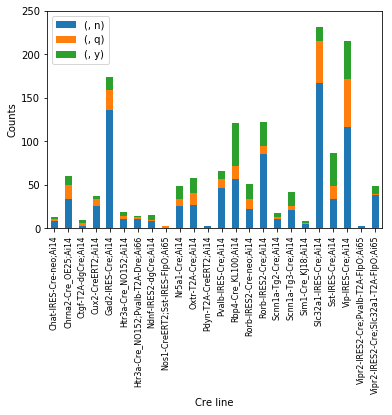

In [42]:
ps7.plot(kind='bar', stacked=True)

axes = plt.gca()
axes.set_ylim(0,250)
plt.xticks(size=8)
plt.legend(loc='upper left')
plt.xlabel('Cre line')
plt.ylabel('Counts')

Text(0,0.5,u'Percentage')

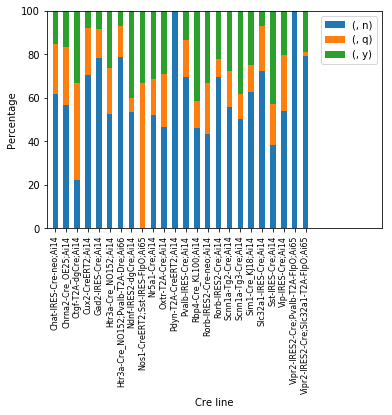

In [52]:
ps8 = ps7.div(ps7.sum(1), axis=0)*100
ps8.plot(kind='bar', stacked=True)

axes = plt.gca()
axes.set_ylim(0,100)
axes.set_xlim(-0.75, 30)
plt.xticks(size=8)
plt.legend(loc='upper right')
plt.xlabel('Cre line')
plt.ylabel('Percentage')